In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
dataframe = pd.read_csv("./Data/train.csv")
dataframe = dataframe[['LotFrontage','LotArea', 'SalePrice']]
dataframe

In [ ]:
def loss_function(y, x, m, b):
    return (y - (m * x + b)) ** 2

In [ ]:
def reject_outliers(lot_area, sale_price,  outlierConstant):
    upper_quartile = np.percentile(lot_area, 65)
    lower_quartile = np.percentile(lot_area, 35)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)

    indices_to_delete = []
    for index, value in enumerate(lot_area):
        if not (value >= quartileSet[0] and value <= quartileSet[1]):
            indices_to_delete.append(index)
            
    return np.delete(lot_area, indices_to_delete), np.delete(sale_price, indices_to_delete)

In [ ]:
def gradient_descent(m_now, b_now, lotAreaPoints, salePricePoints,  learningRate):
    m_gradient = 0
    b_gradient = 0
    n = len(lotAreaPoints)

    for i in range(n):
        x = lotAreaPoints[i]
        y = salePricePoints[i]

        m_gradient += -(2/n) * (x * (y - (m_now * x + b_now)))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * learningRate
    b = b_now - b_gradient * learningRate
    loss_value = loss_function(salePricePoints[i], lotAreaPoints[i], m, b)

    return m, b, loss_value

In [ ]:
def get_values(lot_areas: np.ndarray, sale_prices: np.ndarray, epochs: int, learningRate: float):
    m = 0
    b = 0

    loss_values = []
    for _ in range(epochs):
        m, b, loss_value = gradient_descent(m, b, lot_areas, sale_prices, learningRate)
        loss_values.append(loss_value)

    return m, b, loss_values

In [ ]:
def plot_loss(epochs: int, loss_values: np.ndarray):
    figure, loss = plt.subplots()
    figure.set_label("Loss")
    epoch_values = [x for x in range(epochs)]
    loss.plot(epoch_values, loss_values)

In [ ]:
def plot_ideal(lot_areas: np.ndarray, sale_prices: np.ndarray, regression: plt.Axes):
    lr = linear.LinearRegression()
    lr.fit(lot_areas.reshape(-1, 1), sale_prices.reshape(-1, 1))
    
    m = lr.coef_[0][0]
    b = lr.intercept_[0]

    x_values = list(np.arange(np.min(lot_areas), np.max(lot_areas), 0.01))
    y_values = [m * x + b for x in np.arange(np.min(lot_areas), np.max(lot_areas), 0.01)]

    regression.plot(x_values, y_values, color="orange")


In [ ]:
def plot_mine(m, b, lot_areas: np.ndarray, sale_prices: np.ndarray, regression: plt.Axes):
    x_values = list(np.arange(np.min(lot_areas), np.max(lot_areas), 0.01))
    y_values = [m * x + b for x in np.arange(np.min(lot_areas), np.max(lot_areas), 0.01)]

    regression.scatter(lot_areas, sale_prices)
    regression.plot(x_values, y_values, color="red")

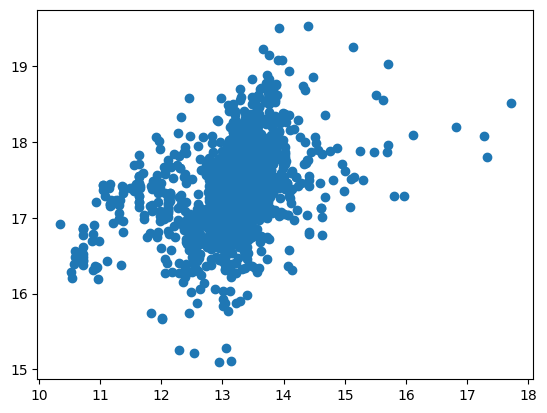

In [13]:
# learningRate = 0.0001
# epochs = 150

scaled_lot_area = np.log2(np.array(dataframe['LotArea']))
scaled_sale_price = np.log10(np.array(dataframe['SalePrice']))

# (lot_areas, sale_prices) = reject_outliers(scaled_lot_area, scaled_sale_price, 1.5)
# (m, b, loss_values) = get_values(lot_areas, sale_prices, epochs, learningRate)

# plot_loss(epochs, np.array(loss_values))

# figure, regression = plt.subplots()

# plot_ideal(lot_areas, sale_prices, regression)
# plot_mine(m, b, lot_areas, sale_prices, regression)


plt.scatter(scaled_lot_area, scaled_sale_price)

ideal_model = linear_model.LinearRegression().fit(scaled_lot_area.reshape(1, -1), scaled_sale_price.reshape(1, -1))
idealy_predicted_values = ideal_model.predict()


In [ ]:
predictions_dataframe = pd.DataFrame({
    'Lot Area': dataframe['LotArea'],
    'Sale Price': dataframe['SalePrice'],
    
})